# Obssim analysis
Read output files, make plots to compare with data

In [42]:
%matplotlib inline
import glob, pickle
os.chdir(os.path.expandvars('$FERMI/skymodels/obssim_monthly'))
!ls

config.txt	  omonth02  omonth06  omonth10	omonth14	 run_tabes.sh
create_months.sh  omonth03  omonth07  omonth11	omonth15	 run_tables.sh
month00		  omonth04  omonth08  omonth12	omonth16	 start_jobs.sh
omonth01	  omonth05  omonth09  omonth13	plot_index.html


In [43]:
sources = [pickle.load(open(f)) for f in glob.glob('omonth*/sources.pickle')]
len(sources)

15

In [44]:
allsrc = pd.concat(sources, axis=0)
transients = allsrc[allsrc.transient]
len(allsrc), len(transients)

(22074, 4252)

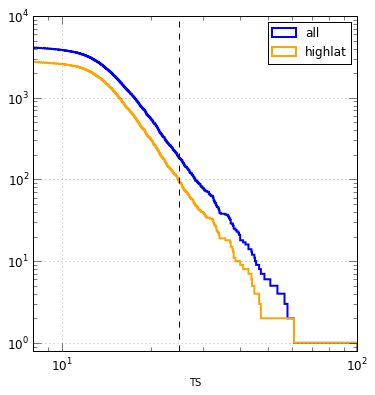

In [45]:
t = transients
fig, ax = plt.subplots(figsize=(6,6))
maxts=100
histkw= dict(bins=np.logspace(0,np.log10(maxts),1000), histtype='step', lw=2, cumulative=-1, log=True)
ax.hist(t.ts.clip(0,maxts), label='all', **histkw);
hilat = np.array(np.abs(t.glat)>10, bool)
ax.hist(t.ts[hilat].clip(0,maxts),color='orange', label='highlat', **histkw);
plt.setp(ax, xlim=(8,maxts), xlabel='TS', xscale='log', ylim=(0.8,None))
ax.axvline(25, color='k', ls='--')
ax.legend(); ax.grid(True, alpha=0.5);

In [46]:
sum(t.ts>10)/15., sum(t.ts>25)/15.

(255.19999999999999, 12.066666666666666)

### Scale to a single month

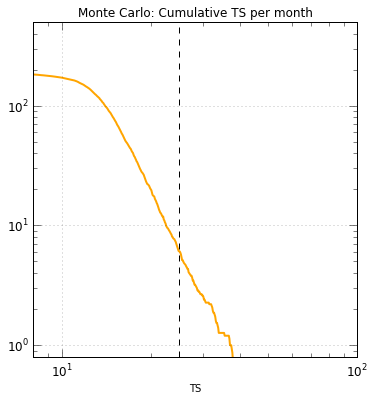

In [68]:
th = np.histogram(t.ts[hilat], histkw['bins'])
tot = sum(hilat)
fig, ax = plt.subplots(figsize=(6,6))
ax.loglog(th[1][:-1],(tot-th[0].cumsum())/15., '-', color='orange', lw=2);
ax.axvline(25, color='k', ls='--')
plt.setp(ax, xlim=(8,maxts), xlabel='TS', xscale='log', ylim=(0.8,500))
ax.set_title('Monte Carlo: Cumulative TS per month')
ax.grid(True, alpha=0.5);


## Save a csv file

In [91]:
#df.to_csv('obssim_transients.csv')
from uw.like2.analyze import transientinfo as ti; print reload(ti)

%time oa = ti.ObssimAnalysis()
print 'Obssim months found: {}, {} sources'.format(len(oa.monthinfo), len(oa.df))

<module 'uw.like2.analyze.transientinfo' from '/afs/slac/g/glast/groups/catalog/pointlike/python/uw/like2/analyze/transientinfo.py'>
CPU times: user 13.9 s, sys: 2.98 s, total: 16.8 s
Wall time: 16.9 s
Obssim months found: 15, 3507 sources


In [92]:
#oa.df.to_csv('obssim_transients.csv')
oa.df.ix[0]

ra                                                   0.6230195
dec                                                  -1.100034
glat                                                 -61.44551
glon                                                  96.61655
ts                                                    10.93777
pindex                                                2.260405
eflux                                                 1.321692
flux                                              2.205249e-12
a                                                    0.1022451
locqual                                                    0.4
aprob                                                      NaN
acat                                                       NaN
adeltats                                                   NaN
has_assoc                                                 True
month                                                        1
skydir       (0.999756593222, 0.0108715230244, -0.01919